<h1><center>CSCI 6515 - Machine Learning for Big Data (Fall 2023)</h1></center>
<h1><center>Assignment 2</h1></center>

<b>Deep Pravinbhai Lad</b>  
<b>Banner ID: B00938094</b>  


### Background Information

Heart disease is dangerous and responsible for many deaths every year. It describes any condition that affects the heart, leading to complications, such as heart failure, heart attack, and stroke. Many risk factors contribute to the development of heart diseases, such as age, smoking, and obesity. Tests and exams are performed to diagnose the disease, which includes exercise or stress tests and electrocardiograms. Motivated by this fact, we try to integrate machine learning research with Public Health Dataset to assist in the identification of the most influential factors or exams that help in heart disease diagnosis. We explore the anonymized dataset of Cleveland, Hungary, Switzerland, and Long Beach V from 1988. Simultaneously, we investigate if ML models may assist doctors in the diagnosis by providing a list of patients that may need more investigation. Finally, we decided to do a few experiments. We will create two different models, one using logistic regression and another using Naïve Bayes to classify the patients that may have heart disease assisting the doctors in the analysis.

To access and collect the heart disease data follow the link: Heart Disease Dataset | Kaggle (https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)[1]

#### Performing necessary library imports

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, auc, log_loss, classification_report

### 1. Task 1: Your first task is doing some research on the dataset.<a id='top'></a>


In [64]:
heart_data = pd.read_csv('heart.csv')

#### **a) Subtask 1.a**

**Process or pre-process the heart disease data. Show the outputs of the pre-processing phase (3)**


In [65]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [66]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [67]:
heart_data.count()

age         1025
sex         1025
cp          1025
trestbps    1025
chol        1025
fbs         1025
restecg     1025
thalach     1025
exang       1025
oldpeak     1025
slope       1025
ca          1025
thal        1025
target      1025
dtype: int64

**Descriptive Analysis** :

Analyzing counts of each features in the heart dataset. It seems like there are total 1025 rows.

In [68]:
heart_data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**Descriptive Analysis** :

There are no values that are NA.

In [69]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**Descriptive Analysis** :

There are no values that are null.

In [70]:
heart_data.duplicated().sum()

723

**Descriptive Analysis** :

This show that there are total 723 rows that have duplicate values. This can introduce bias to the given data and eventually affect model accuracy. However, removing it reduce the datapoints drastically.

In [71]:
distinct_heart_data = heart_data.drop_duplicates()

distinct_heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [72]:
heart_disease_diagnosis = distinct_heart_data['target'].value_counts()
heart_disease_diagnosis

target
1    164
0    138
Name: count, dtype: int64

#### **b) Subtask 1.a+b**
**Process or pre-process the heart disease data. Show the outputs of the pre-processing phase**

**Visually analyze the data after processing or pre-processing. (2)**

** Note: Since EDA goes hand-in-hand with preprocessing

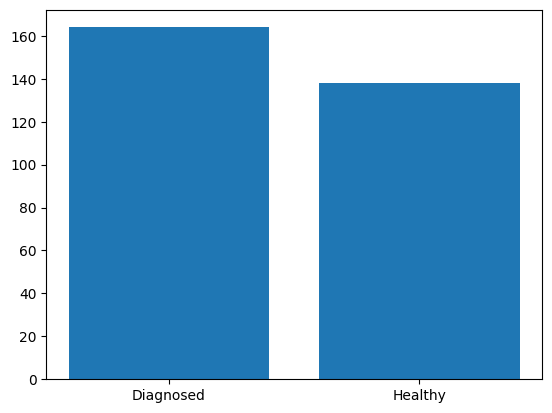

In [73]:
plt.bar(['Diagnosed', 'Healthy'], heart_disease_diagnosis)
plt.show()

**Descriptive Analysis** :

This barplot shows that the data we have so far is almost balanced since we have our nearly same amount of data for `target` in both the categories `Diagnosed-1` and `Healthy-0`.

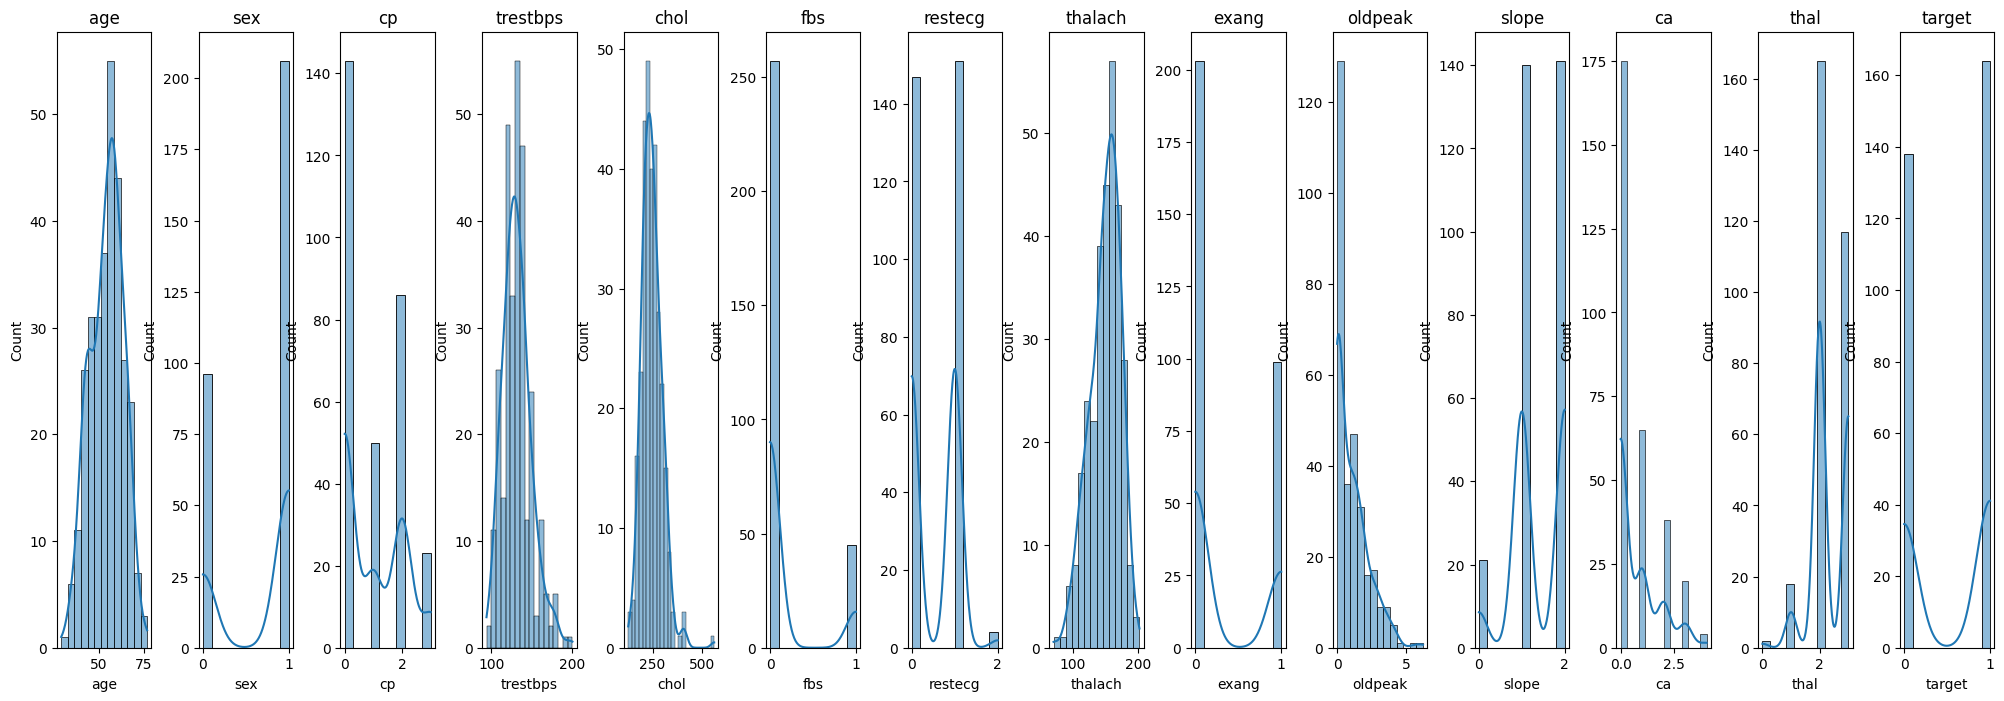

In [74]:
fig, axs = plt.subplots(ncols=len(distinct_heart_data.columns), figsize=(25, 8))
fig.subplots_adjust(wspace=0.5)

for i, column in enumerate(distinct_heart_data.columns):
    sns.histplot(data=distinct_heart_data[column], ax=axs[i], kde=True)
    axs[i].set_title(column)

plt.show()

**Descriptive Analysis** :

The dataset displays various patterns and skewness in the continuous variables:
* `age` follows a typical bell-shaped curve without skewness.
* `trestbps` shows a predominantly left-skewed bell curve with fluctuations at intervals.
* `thalach` has a central tendency toward higher heart rates but exhibits slight right skewness.
* `oldpeak` is left-skewed, suggesting higher values of ST depression.
* The categorical variables don't have KDE plots but signify the distribution or frequency of various categories within each attribute.

These KDE plot descriptions offer insights into the distributions and characteristics of the continuous variables in the heart dataset, aiding in understanding the data's underlying structure and potential trends or patterns.

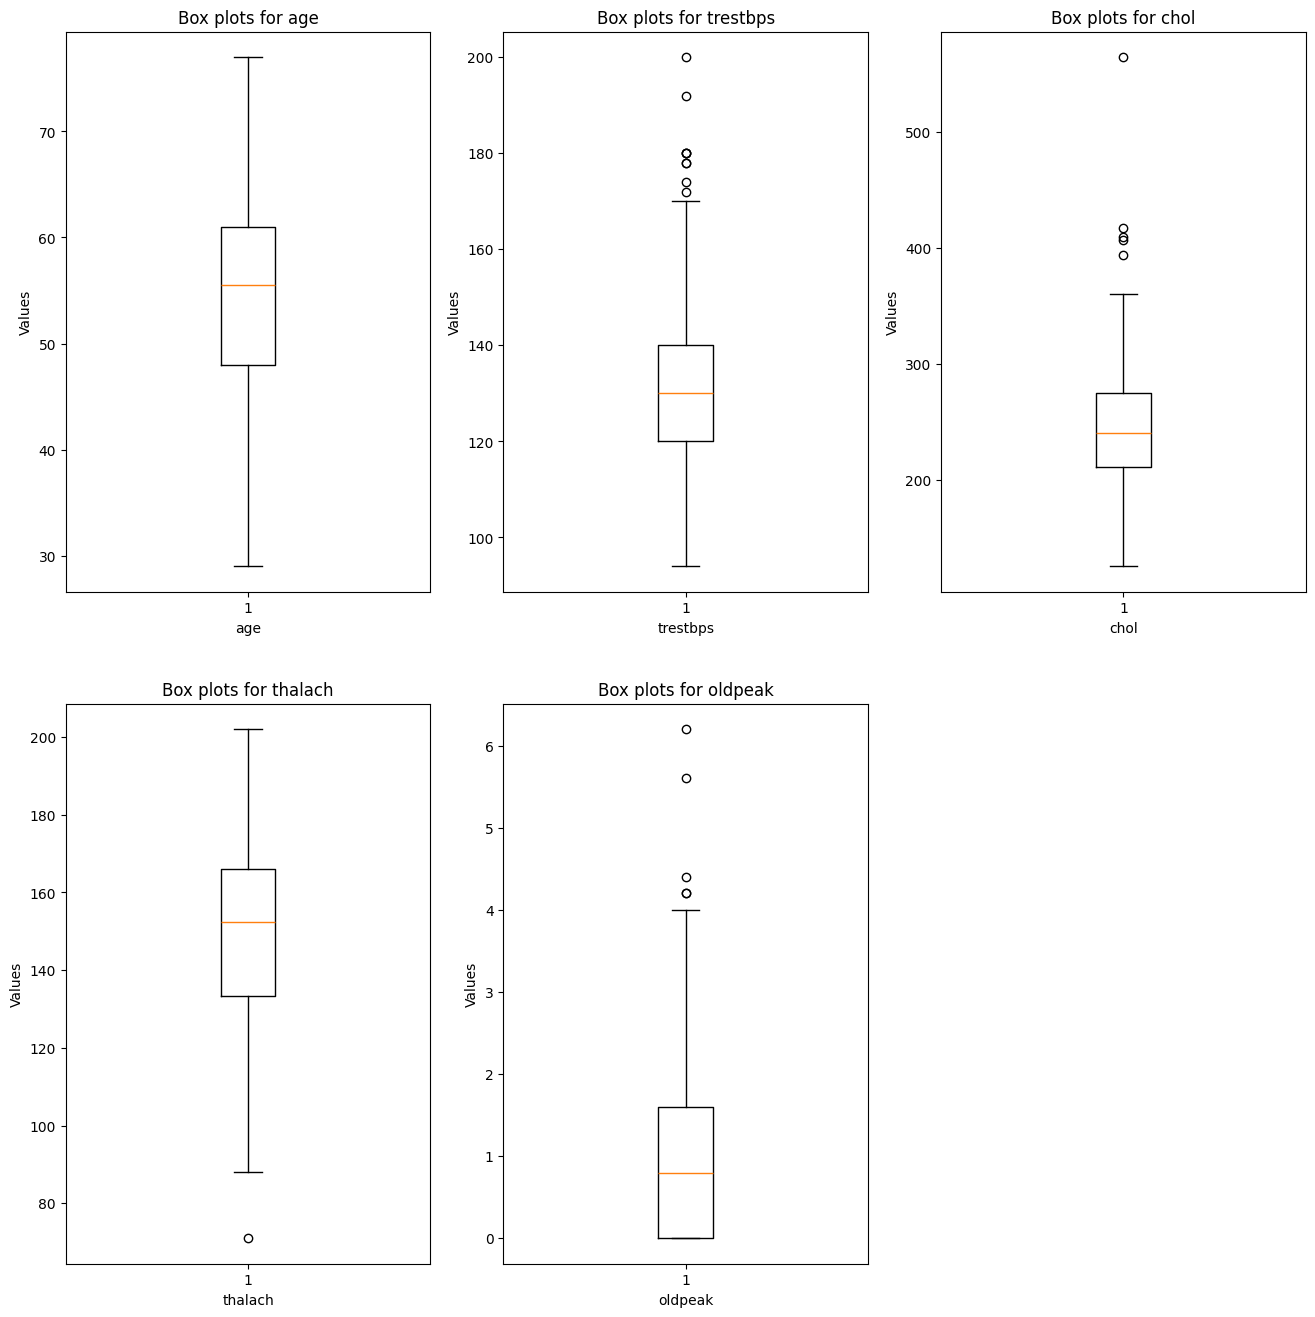

In [75]:
# Selecting numerical columns for box plots
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

plt.figure(figsize=(16, 16))
for i, column in enumerate(numerical_cols, start=1):
    plt.subplot(2, 3, i)
    plt.boxplot(distinct_heart_data[column])
    plt.title(f'Box plots for {column}')
    plt.ylabel('Values')
    plt.xlabel(f'{column}')
plt.show()

**Descriptive Analysis** :

The box plots for continuous variables in the heart dataset provide insights into the central tendency, spread, presence of outliers, and skewness:
* `age` exhibits a symmetric spread with no outliers.
* `trestbps` and `chol` show a moderate spread, with some outliers at the higher end.
* `thalach` show slightly skewed spread, with some outliers at the lower end.
* `oldpeak` presents a skewed distribution with several outliers at higher values.

The categorical variables can't be visually represented through box plots, but they serve to categorize or segment the continuous variables based on their attributes.

The box plots in the heart dataset highlight the distributions, presence of outliers, and the spread of values within each continuous variable, aiding in identifying central tendencies and extremes within the dataset.

In [76]:
oldpeaks_ge_3 = distinct_heart_data[distinct_heart_data['oldpeak'].ge(3)]
oldpeaks_ge_3

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0
11,43,0,0,132,341,1,0,136,1,3.0,1,0,3,0
13,51,1,0,140,298,0,1,122,1,4.2,1,3,3,0
20,60,1,2,140,185,0,0,155,0,3.0,1,0,2,0
22,45,1,0,104,208,0,0,148,1,3.0,1,0,2,1
29,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0
35,46,1,2,150,231,0,1,147,0,3.6,1,0,2,0
54,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0


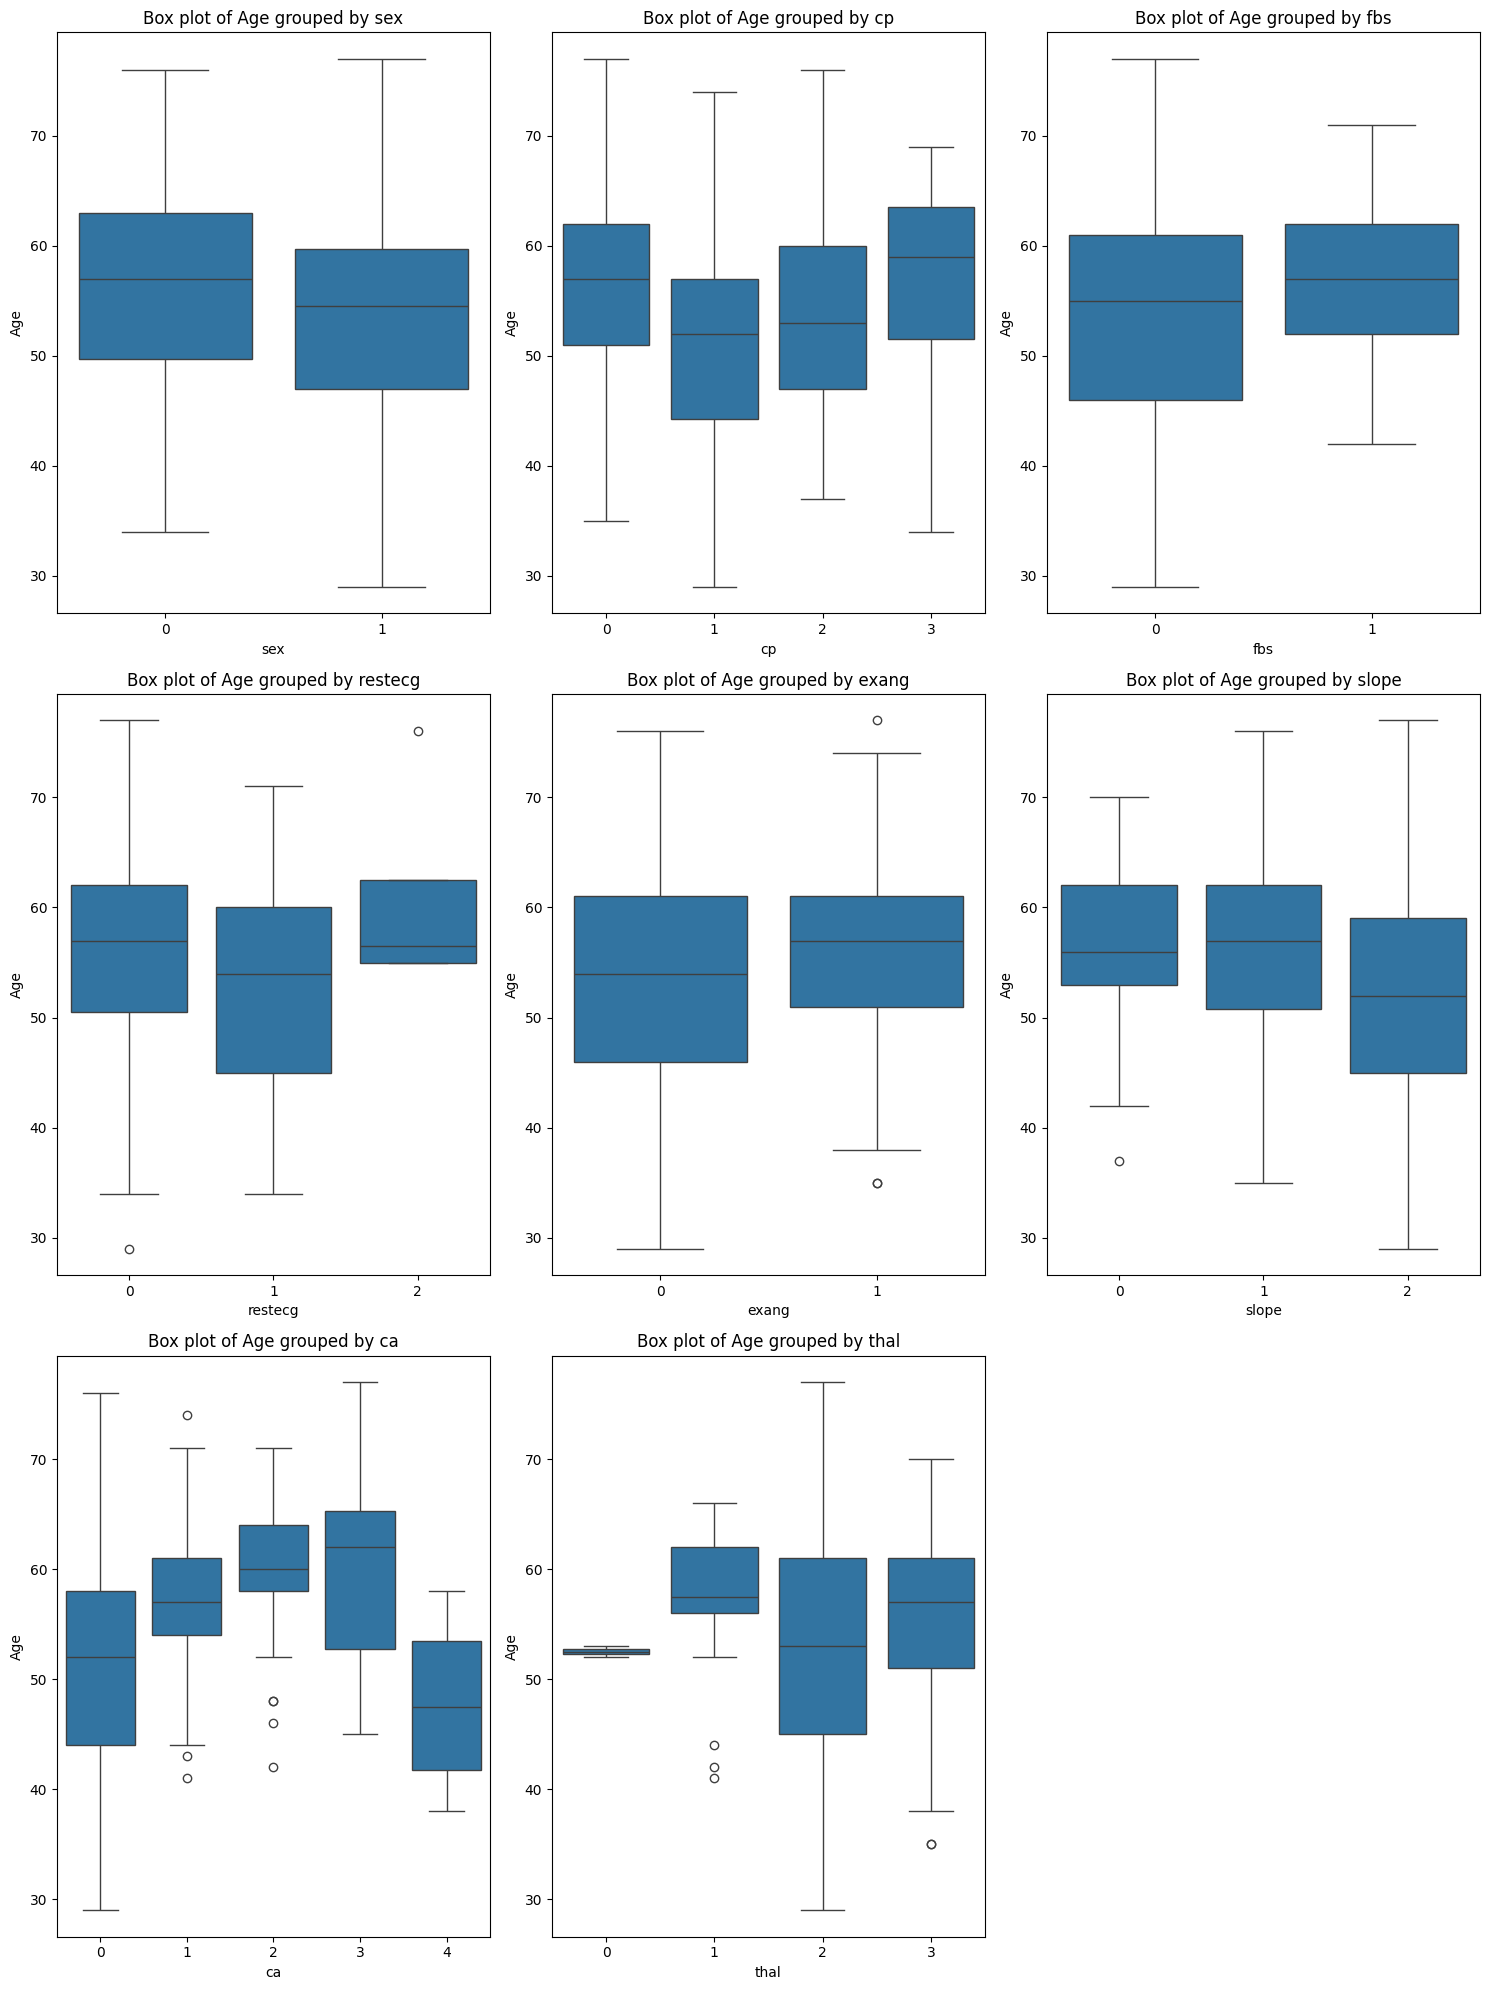

In [77]:
# Categorical columns for box plots
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Create categorical box plots
plt.figure(figsize=(15, 20))

for i, column in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=column, y='age', data=distinct_heart_data)
    plt.title(f'Box plot of Age grouped by {column}')
    plt.xlabel(column)
    plt.ylabel('Age')

plt.tight_layout()
plt.show()

**Descriptive Analysis** :

These box-plots shows the spread of various categorical data based on `age`. Following are the key observations related to some attributes:
* **Chest Pain - `cp`**:
  * __Type - 1 (represented by 0)__:
   Typical Angina is lying in the approximately between age 35-75 with median around 54.
  * __Type - 2 (represented by 1)__:
   Atypical Angina is lying in the approximately between age 29-73 with median around 51.
  * __Type - 3 (represented by 2)__:
   Non-angina is lying in the approximately between age 38-75 with median around 52.
  * __Type - 4 (represented by 3)__:
   Asymptomatic is lying in the approximately between age 34-69 with median around 60.

* **Fasting Blood Sugar - `fbs`**:
  * For those individuals having fasting blood sugar(represented by 0) is above 120 mg/dl is spread between age 45-61 with median around 55.

* **Resting ECG - `restecg`**:
  * Individuals having hyper ecg(represented by 2) is in elderly individuals between age 55-61 with median lying around 57 showing skewness towards lower ages in the range.

* **Exercise Induced Engina - `exang`**:
  * Individuals having exercise induced angina with pain(represented by 1) is spread between age 38-75 with median around 68.
  * Individuals having exercise induced angina without pain(represented by 0) is spread in age range of the dataset with median around 55.



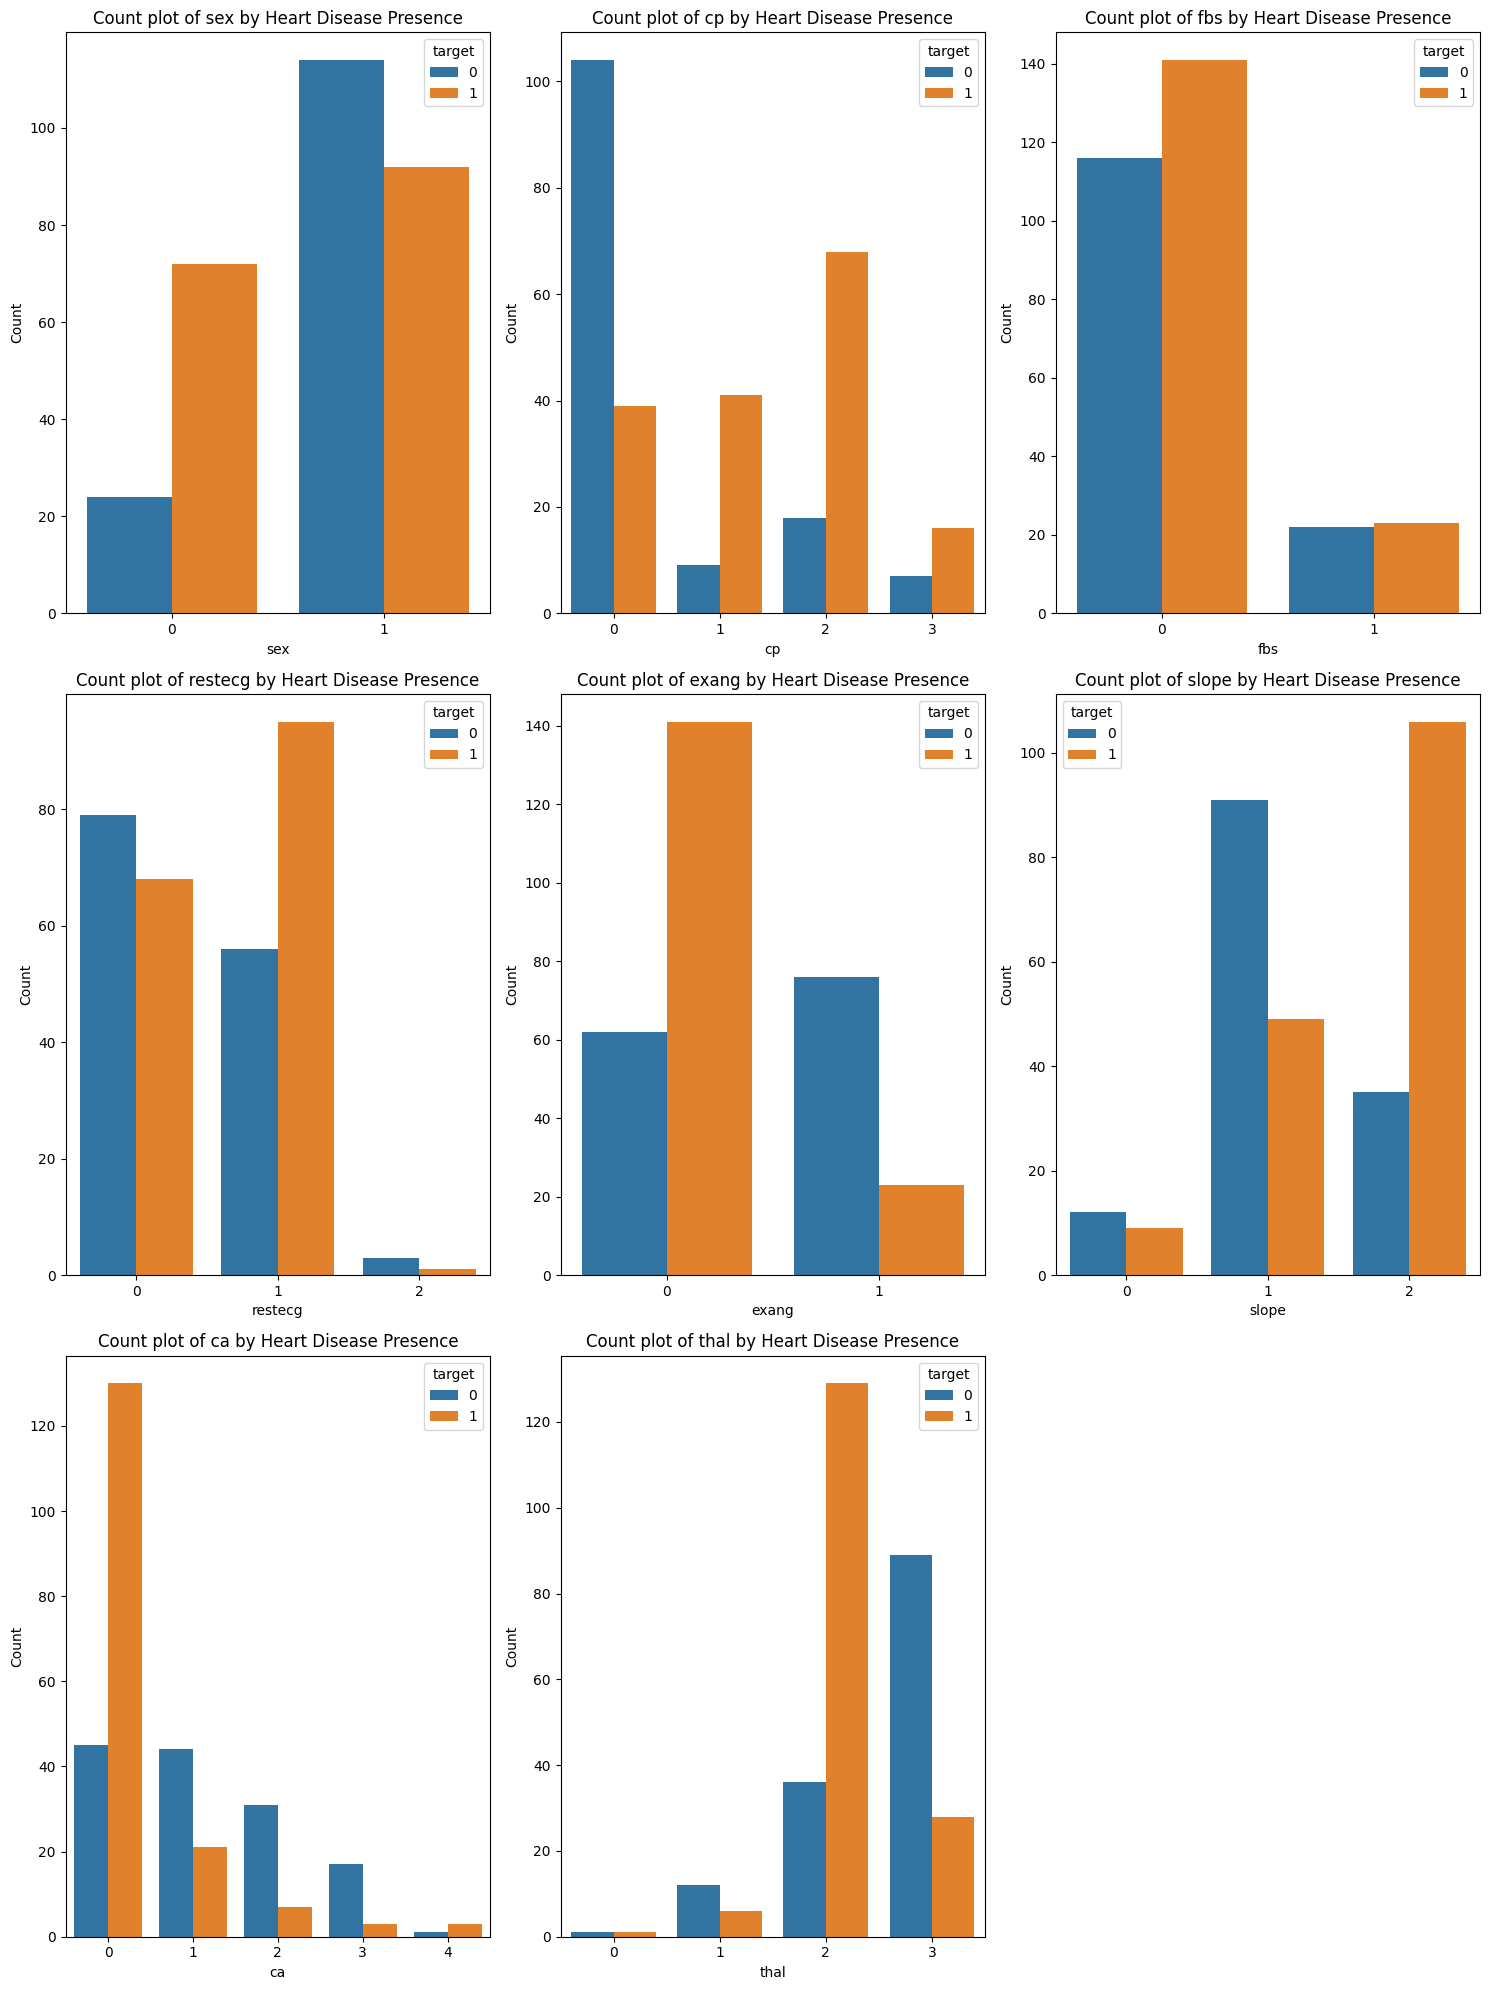

In [78]:
# Create bar plots for categorical variables in relation to 'target'
plt.figure(figsize=(15, 20))

for i, column in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=column, hue='target', data=distinct_heart_data)
    plt.title(f'Count plot of {column} by Heart Disease Presence')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

**Descriptive Analysis** :

These count-plots shows the frequency of various categorical data based on having heart disease(`target`). Following are the key observations related to some attributes:
* **Sex - `sex`**:
  Based on the frequency distribution, females are having more tendency of having heart disease as compared to males.
* **Chest Pain - `cp`**:
  Based on the frequency distribution, individuals having non-angina are at higher risk followed by atypical angina, asymtotic and typical angina.

* **Fasting Blood Sugar - `fbs`**:
  If we consider proportionality of having overall data of those individuals having fasting blood sugar(represented by `0`) is above 120 mg/dl, they are at higher risk. Ther reason is the data we have has equal likliness for that.

* **Resting ECG - `restecg`**:
  * Individuals having abnormal ecg(represented by `3`) are more likely having heart disease.

* **Slope of the peak exercise - `slope`**:
  * Individuals having slope of the peak exercise ST segment either down(`0`) or up(`2`) are more likely having heart disease.

* **Number of major vessels colored by fluoroscopy - `ca`**
  * Those having no major vessels covered i.e. `0` by flouroscopy are more like been detected having heart disease.
  


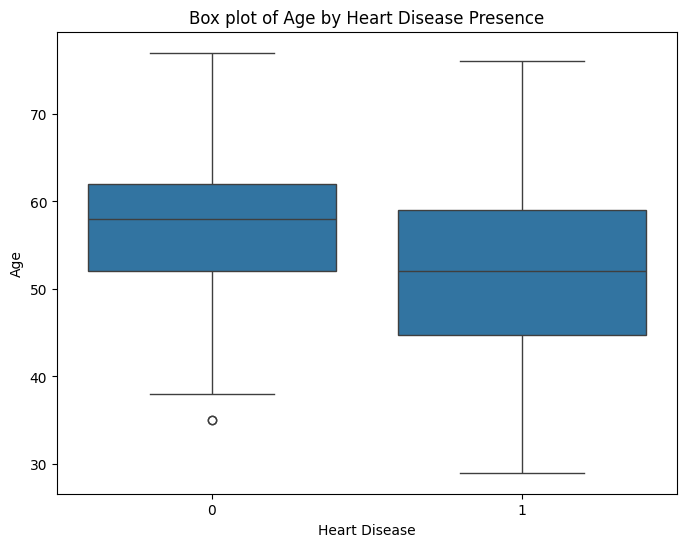

In [79]:
# Numerical column (age) in relation to 'num/target' using box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='age', data=distinct_heart_data)
plt.title('Box plot of Age by Heart Disease Presence')
plt.xlabel('Heart Disease')
plt.ylabel('Age')
plt.show()

**Descriptive Analysis** :
 
 Based on the data, heart disease is spread for the age group 29-79 with median lying around 50.

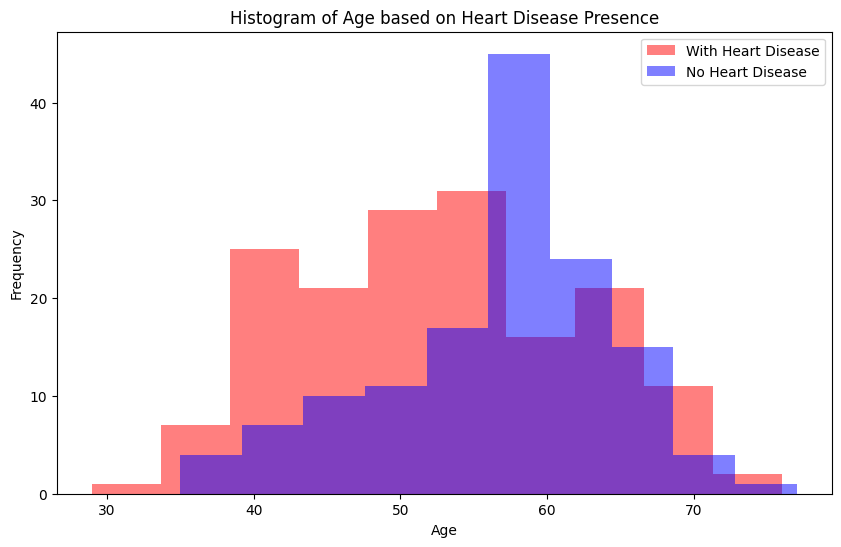

In [80]:
# Separating 'age' values based on 'target' values (0 and 1)
age_with_disease = distinct_heart_data[distinct_heart_data['target'] == 1]['age']
age_without_disease = distinct_heart_data[distinct_heart_data['target'] == 0]['age']

# Creating histograms for 'age' based on 'target'
plt.figure(figsize=(10, 6))

plt.hist(age_with_disease, bins=10, alpha=0.5, color='red', label='With Heart Disease')
plt.hist(age_without_disease, bins=10, alpha=0.5, color='blue', label='No Heart Disease')

plt.title('Histogram of Age based on Heart Disease Presence')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [81]:
# Apply Standard Scaler
scaler = StandardScaler()
distinct_heart_data[numerical_cols] = scaler.fit_transform(distinct_heart_data[numerical_cols])

/var/folders/5z/4ll5zz8n2_lbrzc9b229nysh0000gn/T/ipykernel_74447/2584339803.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distinct_heart_data[numerical_cols] = scaler.fit_transform(distinct_heart_data[numerical_cols])


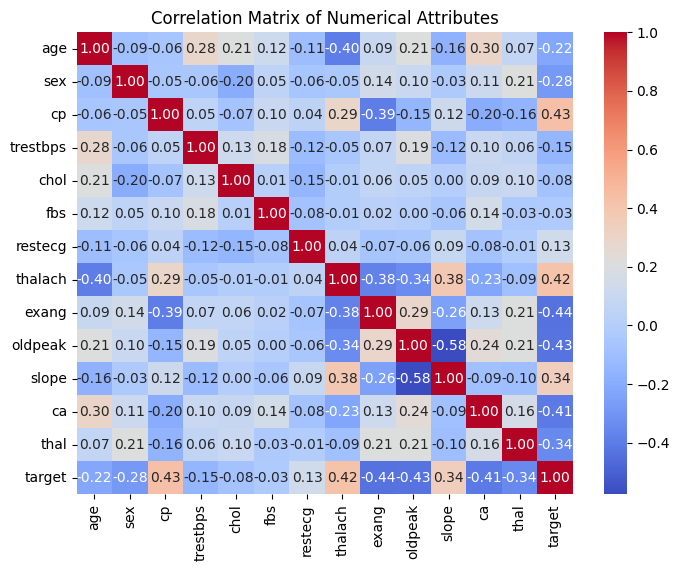

In [82]:
correlation_matrix = distinct_heart_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Attributes')
plt.show()

In [83]:
# Perform one-hot encoding
heart_data_encoded = pd.get_dummies(distinct_heart_data, columns=categorical_cols)

heart_data_encoded.head()


,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,-0.267966,-0.376556,-0.667728,0.806035,-0.037124,0,False,True,True,False,...,True,False,False,True,False,False,False,False,False,True
1,-0.157260,0.478910,-0.841918,0.237495,1.773958,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
2,1.724733,0.764066,-1.403197,-1.074521,1.342748,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
3,0.728383,0.935159,-0.841918,0.499898,-0.899544,0,False,True,True,False,...,True,False,True,False,False,False,False,False,False,True
4,0.839089,0.364848,0.919336,-1.905464,0.739054,0,True,False,True,False,...,False,False,False,False,True,False,False,False,True,False


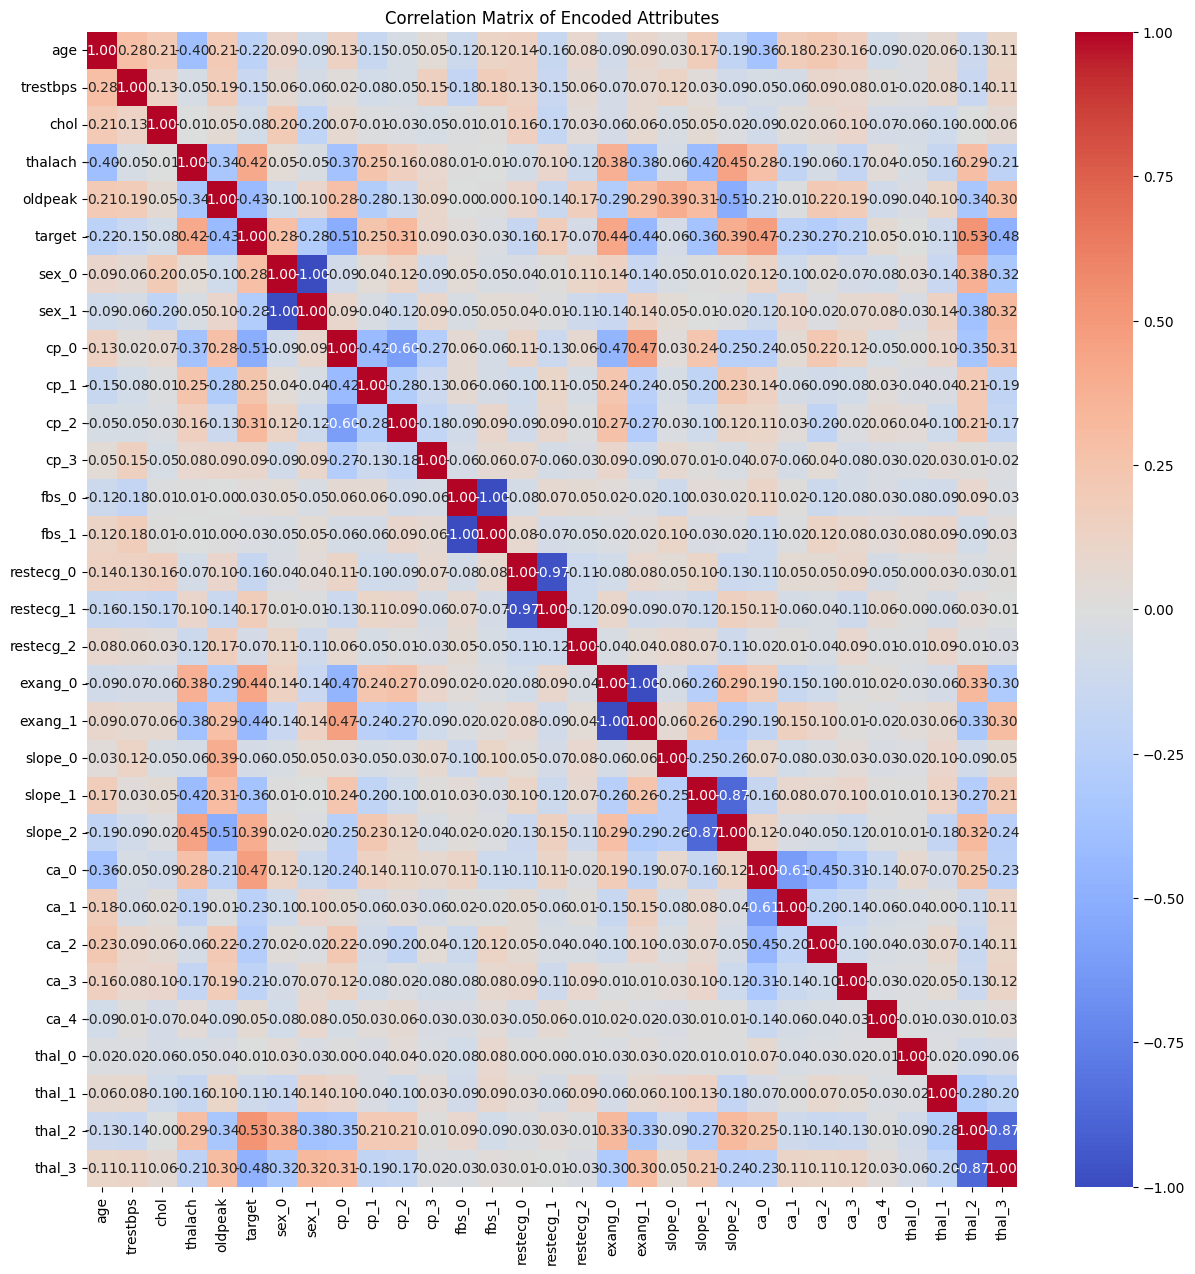

In [84]:
correlation_matrix_encoded_data = heart_data_encoded.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix_encoded_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Encoded Attributes')
plt.show()

#### **c) Subtask 1.c**

**Explain the method(s) you chose for processing/preprocessing and
provide a descriptive analysis to justify your choice. You can resort [1(b)] to justify. (3)**


##### Primary plan

**Step-1 : Identifying and eliminating any missing data points**
   
   _Reason:_ 
        No bias could be created towards values or attributes due to incomplete information. 
   
   _How:_
        These missing values were either replaced with an appropriate value such as the mean or median of the column, or completely removed from the dataset altogether

**Step-2 : Check for duplicates**
   
   _Reason:_ 
        Each observation was unique and there were no repeating data points which could distort analysis
   
   _How:_
        Any duplicate observations were removed

**Step-3: Identify and eliminate any outliers**
   
   _Reason:_
        Outliers are data points that lie far outside of most other data, which can significantly impact model accuracy
   
   _How:_
        Identify using a box plot and removed using Interquartile Range (IQR) method

**Step-4: Standardization of the data**
   
   _Reason:_
        Standardization helps guarantee no one attribute has more influence over the model than others
   
   _How:_
        By subtracting the mean and dividing by standard deviation for each attribute

##### Executed Steps:

**Identified and handled missing data** by *checking counts*, *sum of null values*, and using methods like `.isna()` and `.isnull()` to manage or drop missing data points.
  
* Checking for missing values is essential to ensure data completeness and accuracy in analyses, as the absence of this information could potentially introduce bias or errors into the dataset, impacting the reliability of subsequent analysis and results. Therefore, identifying and handling missing values is crucial to maintain data integrity and ensure robustness in analytical procedures.

**Removed duplicates** by employing `.drop_duplicates()` *after checking with* `.duplicated()`.
   
* Removing duplicates is crucial to ensure data integrity and accuracy in analysis, as repeated observations could skew statistical measures and lead to inflated significance of particular data points, potentially distorting the true representation of the dataset. This action maintains the uniqueness of each observation, preventing bias and preserving the reliability of the analysis.

**Performed initial outlier identification** using visualizations such as *box plots* and planned to manage them *using the Interquartile Range (IQR)* method.

* Checking for outliers is important to identify extreme values that can significantly skew statistical analyses or machine learning models, impacting their accuracy and reliability. Outliers can distort the distribution and central tendencies within the data, potentially influencing critical decisions and insights drawn from the analysis.

**Standardized** the data using `StandardScaler `*for numerical attributes* and applied *one-hot encoding to categorical variables*.
* **StandardScaler:**
  Used to normalize numerical attributes like `age`, `trestbps`, `chol`, `thalach`, and `oldpeak`. Standardization ensures uniformity in scale, *preventing any single attribute from dominating the model* due to larger magnitudes, enabling fair and accurate comparisons among features during modeling.
* **One-hot Encoding:**
  One-hot encoding is essential for categorical attributes like `sex`, `cp` (Chest Pain), `fbs` (Fasting Blood Sugar), `restecg` (Resting Electrocardiographic Result), `exang` (Exercise Induced Angina), `slope`, `ca` (Number of Major Vessels Colored by Fluoroscopy), and `thal` (Duration of the Exercise Test). This transformation ensures numerical representation of categorical variables, *preventing the misinterpretation of ordinal data* and allowing models to comprehend categorical attributes accurately during analysis and prediction.

**Visualizations:**

* **Barplot:** Displayed the distribution of the `Diagnosed-1` and `Healthy-0` categories in the target variable, *indicating a balanced or imbalanced dataset*.

* **KDE plots:** Offered insights into the distributions and skewness of continuous variables (`age`, `trestbps`, `thalach`, `oldpeak`). Identified characteristics like bell-shaped distributions and skewness, aiding in *understanding data patterns and central tendencies*.

* **Box plots:** Provided a summary of the spread, presence of outliers, and skewness in continuous attributes (`age`, `trestbps`, `chol`, `thalach`, `oldpeak`). Helped in *visualizing median*, *quartiles*, *outliers*, and *spread*, facilitating outlier identification and distribution insights.

* **Categorical Attributes based on Age:** Demonstrated the *spread of various categorical attributes across different age groups* based on `age`. Gave insights into how categorical variables (`cp`, `fbs`, `restecg`, `exang`) are distributed among various age brackets.

* **Count plots based on having heart disease or not:**  Illustrated the frequency distribution of categorical attributes based on the presence or absence of heart disease (`target`). Provided *insights into attribute frequencies* (`sex`, `cp`, `fbs`, `restecg`, `slope`, `ca`) *in correlation with heart disease diagnosis*.

* **Box plot for having heart disease or not based on age:** Highlighted the spread of age groups concerning the presence or absence of heart disease, providing a clear visualization of *age-related differences and medians for the diagnosed and healthy groups*.

**Additional Observations:**

Detailed and descriptive analysis of each visualization.
*Decision not to remove outliers* due to *limited data* size (`~300 rows`).

The steps executed and visualizations provided a comprehensive understanding of the dataset, assisting in data cleaning, outlier identification, and insights into the relationships between different attributes and heart disease presence. The interpretations and observations drawn from the visualizations added depth to the analysis.

### 2. Task 2<a id='top'></a>

#### **a) Subtask 2.a**

**Apply Naive Bayes classifier on your dataset (3)**

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# Split the data into features (X) and the target variable (y)
X = heart_data_encoded.drop('target', axis=1)
y = distinct_heart_data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gaussian Naive Bayes classifier
naive_bayes = GaussianNB()

# Train the classifier
naive_bayes.fit(X_train, y_train)

# Predict on the test set
y_pred = naive_bayes.predict(X_test)

#### **b) Subtask 2.b**

**Evaluate the performance for disease classification (2)**

In [86]:
print("Scores for Naive Bayes Classifier")
print(classification_report(y_test, y_pred))

Scores for Naive Bayes Classifier
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        32
           1       0.72      0.72      0.72        29

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



Confusion Matrix:


<Axes: >

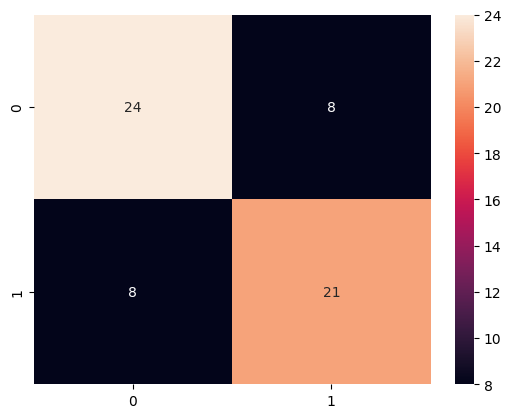

In [87]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
sns.heatmap(conf_matrix, annot=True)

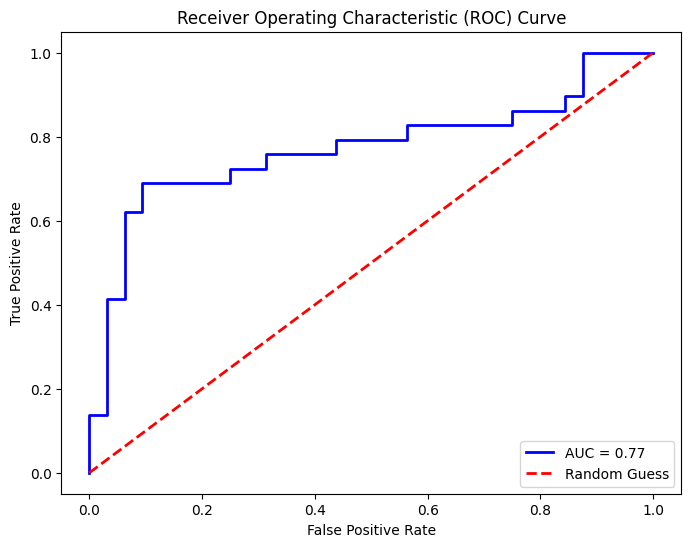

In [88]:
# Predict probabilities of the positive class
y_scores = naive_bayes.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### 3. Task 3<a id='top'></a>

In [89]:
from sklearn.linear_model import SGDClassifier

In [90]:
X_train_val, X_val, y_train_val, y_val = train_test_split (X_train, y_train, test_size=0.2, random_state=42)

#### **a) Subtask 3.a**

**Repeat task [2] by applying logistic regression with gradient descent (3)**

##### Logistic Regression with Gradient Descent

In [91]:
from sklearn.linear_model import LogisticRegression
# Initialize and train the Logistic Regression model with gradient descent
logreg = LogisticRegression(solver='saga', max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Predictions on the test set
predictions = logreg.predict(X_test)

In [92]:
print("Scores for Logistic Regression with Gradient Descent")
print(classification_report(y_test, predictions))

Scores for Logistic Regression with Gradient Descent
              precision    recall  f1-score   support

           0       0.86      0.78      0.82        32
           1       0.78      0.86      0.82        29

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



Confusion Matrix:


<Axes: >

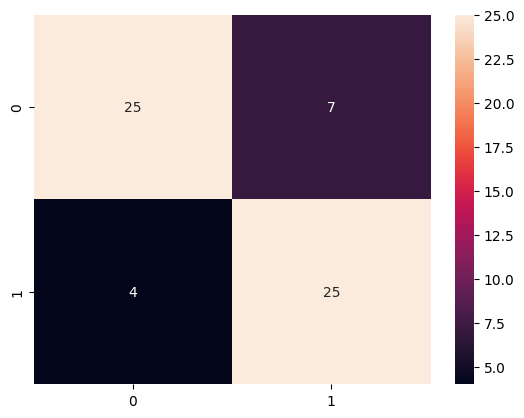

In [93]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print('Confusion Matrix:')
sns.heatmap(conf_matrix, annot=True)

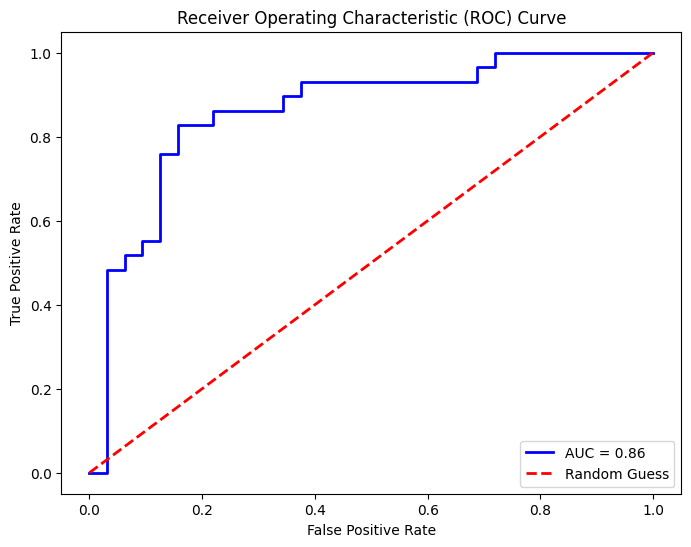

In [94]:
# Predict probabilities of the positive class
y_scores_lg = logreg.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores_lg)
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

##### Logistic Regression with Custom Gradient Descent

In [95]:
class SingleInstanceGradientDescent:
    def __init__(self, iterations=30):
        self.iterations = iterations
        self.classifier = SGDClassifier(loss='log_loss', learning_rate='constant', eta0=0.01, max_iter=iterations, tol=None, shuffle=True, warm_start=True)
        self._train_loss_list = []
        self._validate_loss_list = []
        self._test_loss_list = []

    def gradient_descent_evaluation(self, X_train_set, y_train_set, X_validate, y_validate, X_testing, y_testing):
        for i in range(self.iterations):
            self.classifier.partial_fit(X_train_set[i:i + 1], y_train_set[i:i + 1], classes=np.unique(y_train_set))
            self._train_loss_list.append(log_loss(y_train_set, self.classifier.predict_proba(X_train_set)))
            self._validate_loss_list.append(log_loss(y_validate, self.classifier.predict_proba(X_validate)))
            self._test_loss_list.append(log_loss(y_testing, self.classifier.predict_proba(X_testing)))
        print("Scores for Single Instance Gradient Descent on Testset:")
        print(classification_report(y_testing, self.classifier.predict(X_testing)))

        print("Confusion Matrix for Testset:")
        conf_matrix = confusion_matrix(y_testing, self.classifier.predict(X_testing))
        sns.heatmap(conf_matrix, annot=True)


    def get_train_loss_list(self):
        return self._train_loss_list

    def get_validate_loss_list(self):
        return self._validate_loss_list

    def get_test_loss_list(self):
        return self._test_loss_list

Scores for Single Instance Gradient Descent on Testset:
              precision    recall  f1-score   support

           0       1.00      0.06      0.12        32
           1       0.49      1.00      0.66        29

    accuracy                           0.51        61
   macro avg       0.75      0.53      0.39        61
weighted avg       0.76      0.51      0.38        61

Confusion Matrix for Testset:


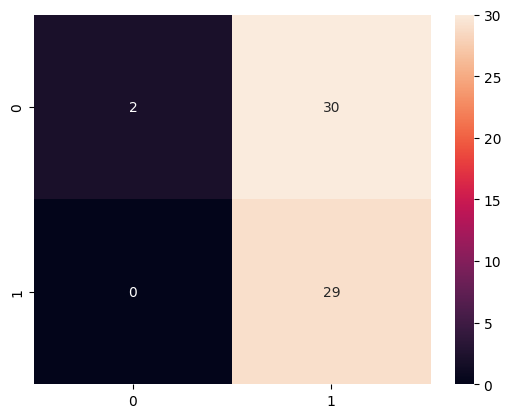

In [96]:
single_instance_gd = SingleInstanceGradientDescent(1)
single_instance_gd.gradient_descent_evaluation(X_train_val, y_train_val, X_val, y_val, X_test, y_test)


In [97]:
single_instance_test_loss = single_instance_gd.get_test_loss_list()
print(f"Single Instance Test Loss: {single_instance_test_loss}")


Single Instance Test Loss: [0.6923739399063386]


In [98]:
single_instance_train_loss = single_instance_gd.get_train_loss_list()
print(f"Single Instance Train Loss: {single_instance_train_loss}")

Single Instance Train Loss: [0.6890328165287564]


In [99]:
single_instance_val_loss = single_instance_gd.get_validate_loss_list()
print(f"Single Instance Validation Loss: {single_instance_val_loss}")

Single Instance Validation Loss: [0.6911320621936056]


#### **b) Subtask 3.b**

**Compare the performance of task 3[a] with batch gradient descent, mini-batch gradient descent, and stochastic gradient descent (3)**

##### Batch Gradient Descent

In [100]:
class FullBatchGradientDescent:
    def __init__(self, iterations=30):
        self.iterations = iterations
        self.classifier = SGDClassifier(loss='log_loss', learning_rate='constant', eta0=0.01, max_iter=iterations, tol=None, shuffle=True, warm_start=True)
        self._train_loss_list = []
        self._validate_loss_list = []
        self._test_loss_list = []

    def gradient_descent_evaluation(self, X_train_set, y_train_set, X_validate, y_validate, X_testing, y_testing):
        for epoch in range(self.iterations):
            self.classifier.partial_fit(X_train_set, y_train_set, classes=np.unique(y_train_set))
            self._train_loss_list.append(log_loss(y_train_set, self.classifier.predict_proba(X_train_set)))
            self._validate_loss_list.append(log_loss(y_validate, self.classifier.predict_proba(X_validate)))
            self._test_loss_list.append(log_loss(y_testing, self.classifier.predict_proba(X_testing)))

        print("Scores for Full Batch Gradient Descent on Testset:")
        print(classification_report(y_testing, self.classifier.predict(X_testing)))

        print("Confusion Matrix for Testset:")
        conf_matrix = confusion_matrix(y_testing, self.classifier.predict(X_testing))
        sns.heatmap(conf_matrix, annot=True)

    def get_train_loss_list(self):
        return self._train_loss_list


    def get_validate_loss_list(self):
        return self._validate_loss_list

    def get_test_loss_list(self):
        return self._test_loss_list

Scores for Full Batch Gradient Descent on Testset:
              precision    recall  f1-score   support

           0       0.86      0.59      0.70        32
           1       0.67      0.90      0.76        29

    accuracy                           0.74        61
   macro avg       0.77      0.75      0.73        61
weighted avg       0.77      0.74      0.73        61

Confusion Matrix for Testset:


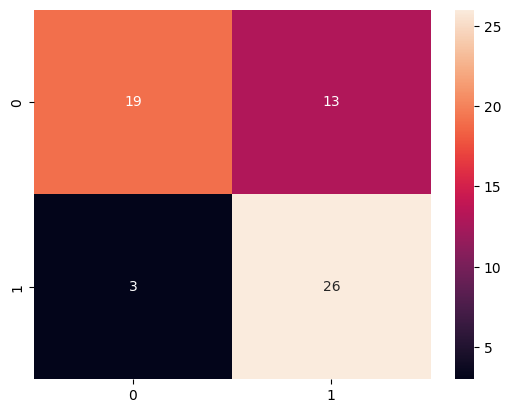

In [101]:
full_batch_gd = FullBatchGradientDescent(1)
full_batch_gd.gradient_descent_evaluation(X_train_val, y_train_val, X_val, y_val, X_test, y_test)


In [102]:
full_batch_test_loss = full_batch_gd.get_test_loss_list()
print(f"Single Instance Test Loss: {full_batch_test_loss}")


Single Instance Test Loss: [0.5420798570312912]


In [103]:
full_batch_train_loss = full_batch_gd.get_train_loss_list()
print(f"Single Instance Train Loss: {full_batch_train_loss}")

Single Instance Train Loss: [0.45800585138405353]


In [104]:
full_batch_val_loss = full_batch_gd.get_validate_loss_list()
print(f"Single Instance Validation Loss: {full_batch_val_loss}")

Single Instance Validation Loss: [0.44981534149465957]


##### Mini-batch Gradient Descent

In [105]:
class MiniBatchGradientDescent:
    def __init__(self, iterations=30, size=32):
        self.iterations = iterations
        self.size = size
        self.classifier = SGDClassifier(loss='log_loss', learning_rate='constant', eta0=0.01, max_iter=iterations, tol=None, shuffle=True, warm_start=True)
        self._train_loss_list = []
        self._validate_loss_list = []
        self._test_loss_list = []

    def gradient_descent_evaluation(self, X_train_set, y_train_set, X_validate, y_validate, X_testing, y_testing):
        for epoch in range(self.iterations):
            for i in range(0, X_train_set.shape[0], self.size):
                self.classifier.partial_fit(X_train_set[i:i + self.size], y_train_set[i:i + self.size], classes=np.unique(y_train_set))
            self._train_loss_list.append(log_loss(y_train_set, self.classifier.predict_proba(X_train_set)))
            self._validate_loss_list.append(log_loss(y_validate, self.classifier.predict_proba(X_validate)))
            self._test_loss_list.append(log_loss(y_testing, self.classifier.predict_proba(X_testing)))
        
        print("Scores for Mini Batch Gradient Descent on Testset:")
        print(classification_report(y_testing, self.classifier.predict(X_testing)))

        print("Confusion Matrix for Testset:")
        conf_matrix = confusion_matrix(y_testing, self.classifier.predict(X_testing))
        sns.heatmap(conf_matrix, annot=True)


    def get_train_loss_list(self):
        return self._train_loss_list

    def get_validate_loss_list(self):
        return self._validate_loss_list

    def get_test_loss_list(self):
        return self._test_loss_list

Scores for Mini Batch Gradient Descent on Testset:
              precision    recall  f1-score   support

           0       0.85      0.69      0.76        32
           1       0.71      0.86      0.78        29

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61

Confusion Matrix for Testset:


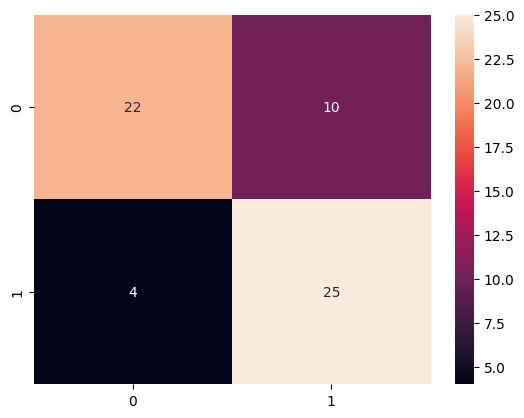

In [106]:
mini_batch_gd = MiniBatchGradientDescent(1, size=30)
mini_batch_gd.gradient_descent_evaluation(X_train_val, y_train_val, X_val, y_val, X_test, y_test)


In [107]:
mini_batch_test_loss = mini_batch_gd.get_test_loss_list()
print(f"Single Instance Test Loss: {mini_batch_test_loss}")


Single Instance Test Loss: [0.5326200825152693]


In [108]:
mini_batch_train_loss = mini_batch_gd.get_train_loss_list()
print(f"Single Instance Train Loss: {mini_batch_train_loss}")

Single Instance Train Loss: [0.4576537995034829]


In [109]:
mini_batch_val_loss = mini_batch_gd.get_validate_loss_list()
print(f"Single Instance Validation Loss: {mini_batch_val_loss}")

Single Instance Validation Loss: [0.4500914093980719]


##### Stochastic Gradient Descent

In [110]:
class StochasticGradientDescent:
    def __init__(self, iterations=30):
        self.iterations = iterations
        self.classifier = SGDClassifier(loss='log_loss', learning_rate='constant', eta0=0.01, max_iter=iterations, tol=None, shuffle=True, warm_start=True)
        self._train_loss_list = []
        self._validate_loss_list = []
        self._test_loss_list = []

    def gradient_descent_evaluation(self, X_train_set, y_train_set, X_validate, y_validate, X_testing, y_testing):
        for epoch in range(self.iterations):
            indices = np.random.permutation(X_train_set.shape[0])
            for i in indices:
                self.classifier.partial_fit(X_train_set[i:i + 1], y_train_set[i:i + 1], classes=np.unique(y_train_set))
            self._train_loss_list.append(log_loss(y_train_set, self.classifier.predict_proba(X_train_set)))
            self._validate_loss_list.append(log_loss(y_validate, self.classifier.predict_proba(X_validate)))
            self._test_loss_list.append(log_loss(y_testing, self.classifier.predict_proba(X_testing)))

        print("Scores for Stochastic Gradient Descent on Testset:")
        print(classification_report(y_testing, self.classifier.predict(X_testing)))

        print("Confusion Matrix for Testset:")
        conf_matrix = confusion_matrix(y_testing, self.classifier.predict(X_testing))
        sns.heatmap(conf_matrix, annot=True)

    def get_train_loss_list(self):
        return self._train_loss_list

    def get_validate_loss_list(self):
        return self._validate_loss_list

    def get_test_loss_list(self):
        return self._test_loss_list

Scores for Stochastic Gradient Descent on Testset:
              precision    recall  f1-score   support

           0       0.85      0.69      0.76        32
           1       0.71      0.86      0.78        29

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61

Confusion Matrix for Testset:


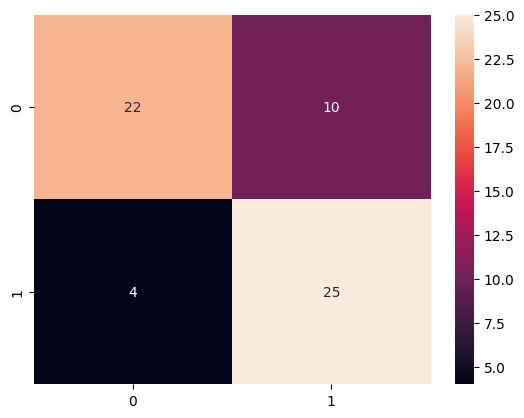

In [111]:
stochastic_gd = StochasticGradientDescent(1)
stochastic_gd.gradient_descent_evaluation(X_train_val, y_train_val, X_val, y_val, X_test, y_test)


In [112]:
stochastic_test_loss = stochastic_gd.get_test_loss_list()
print(f"Single Instance Test Loss: {stochastic_test_loss}")


Single Instance Test Loss: [0.534962066050261]


In [113]:
stochastic_train_loss = stochastic_gd.get_train_loss_list()
print(f"Single Instance Train Loss: {stochastic_train_loss}")

Single Instance Train Loss: [0.45967789358646466]


In [114]:
stochastic_val_loss = stochastic_gd.get_validate_loss_list()
print(f"Single Instance Validation Loss: {stochastic_val_loss}")

Single Instance Validation Loss: [0.45280955530048844]


#### **c) Subtask 3.c**

**Display training, validation, and test loss over 30 epochs. (2)**

Scores for Single Instance Gradient Descent on Testset:
              precision    recall  f1-score   support

           0       0.89      0.25      0.39        32
           1       0.54      0.97      0.69        29

    accuracy                           0.59        61
   macro avg       0.71      0.61      0.54        61
weighted avg       0.72      0.59      0.53        61

Confusion Matrix for Testset:


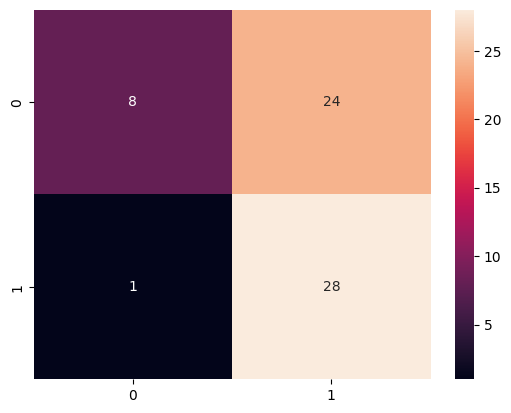

In [115]:
single_instance_gd_30ep = SingleInstanceGradientDescent()
single_instance_gd_30ep.gradient_descent_evaluation(X_train_val, y_train_val, X_val, y_val, X_test, y_test)

Scores for Full Batch Gradient Descent on Testset:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78        32
           1       0.74      0.86      0.79        29

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61

Confusion Matrix for Testset:


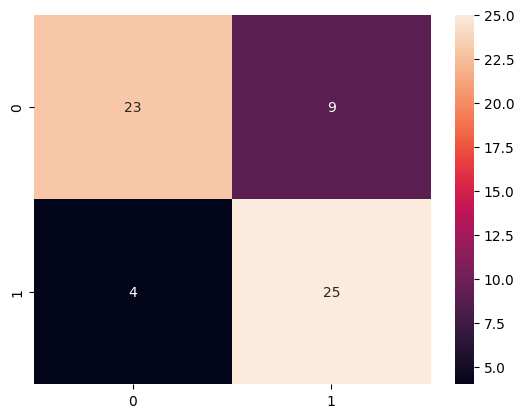

In [116]:
full_batch_gd_30ep = FullBatchGradientDescent()
full_batch_gd_30ep.gradient_descent_evaluation(X_train_val, y_train_val, X_val, y_val, X_test, y_test)


Scores for Mini Batch Gradient Descent on Testset:
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        32
           1       0.76      0.86      0.81        29

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61

Confusion Matrix for Testset:


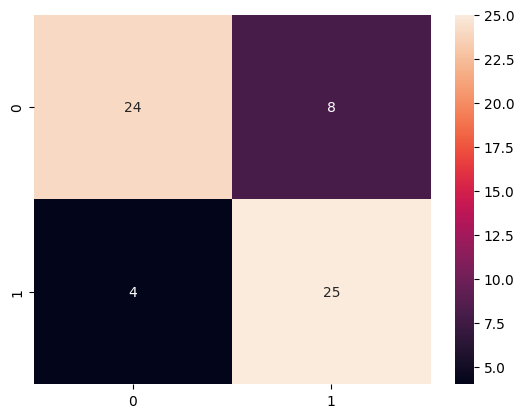

In [117]:
mini_batch_gd_30ep = MiniBatchGradientDescent()
mini_batch_gd_30ep.gradient_descent_evaluation(X_train_val, y_train_val, X_val, y_val, X_test, y_test)

Scores for Stochastic Gradient Descent on Testset:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78        32
           1       0.74      0.86      0.79        29

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61

Confusion Matrix for Testset:


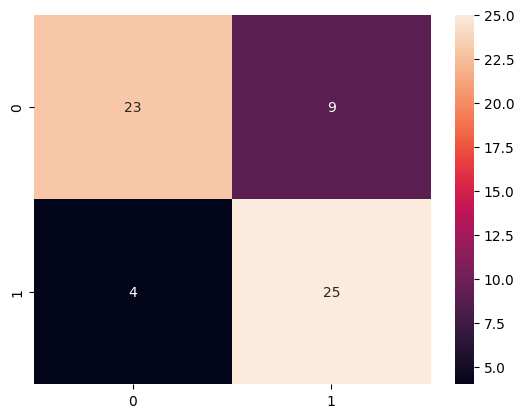

In [118]:

stochastic_gd_30ep = StochasticGradientDescent()
stochastic_gd_30ep.gradient_descent_evaluation(X_train_val, y_train_val, X_val, y_val, X_test, y_test)

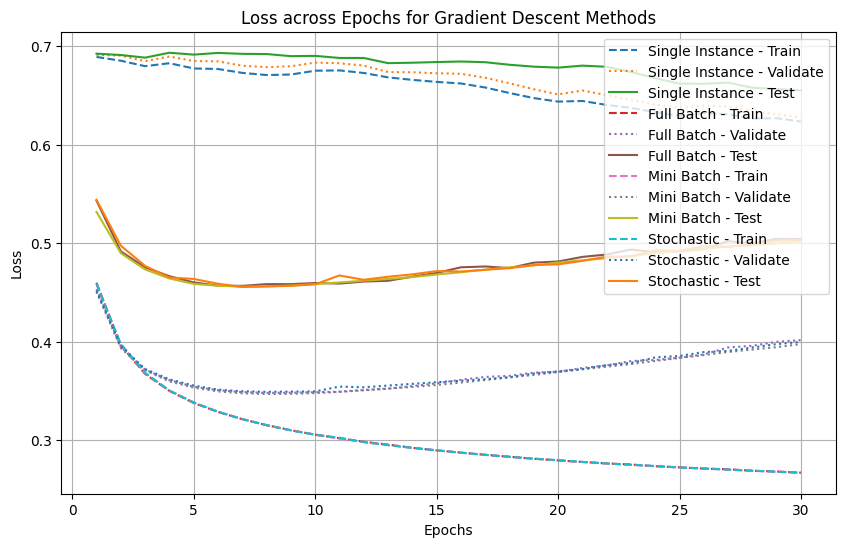

In [119]:
# Retrieve the loss lists for each method
single_instance_train_loss = single_instance_gd_30ep.get_train_loss_list()
single_instance_validate_loss = single_instance_gd_30ep.get_validate_loss_list()
single_instance_test_loss = single_instance_gd_30ep.get_test_loss_list()

full_batch_train_loss = full_batch_gd_30ep.get_train_loss_list()
full_batch_validate_loss = full_batch_gd_30ep.get_validate_loss_list()
full_batch_test_loss = full_batch_gd_30ep.get_test_loss_list()

mini_batch_train_loss = mini_batch_gd_30ep.get_train_loss_list()
mini_batch_validate_loss = mini_batch_gd_30ep.get_validate_loss_list()
mini_batch_test_loss = mini_batch_gd_30ep.get_test_loss_list()

stochastic_train_loss = stochastic_gd_30ep.get_train_loss_list()
stochastic_validate_loss = stochastic_gd_30ep.get_validate_loss_list()
stochastic_test_loss = stochastic_gd_30ep.get_test_loss_list()

epochs = range(1, 31) 

# Plotting the loss values across epochs for each method
plt.figure(figsize=(10, 6))

plt.plot(epochs, single_instance_train_loss, label='Single Instance - Train', linestyle='--')
plt.plot(epochs, single_instance_validate_loss, label='Single Instance - Validate', linestyle=':')
plt.plot(epochs, single_instance_test_loss, label='Single Instance - Test')

plt.plot(epochs, full_batch_train_loss, label='Full Batch - Train', linestyle='--')
plt.plot(epochs, full_batch_validate_loss, label='Full Batch - Validate', linestyle=':')
plt.plot(epochs, full_batch_test_loss, label='Full Batch - Test')

plt.plot(epochs, mini_batch_train_loss, label='Mini Batch - Train', linestyle='--')
plt.plot(epochs, mini_batch_validate_loss, label='Mini Batch - Validate', linestyle=':')
plt.plot(epochs, mini_batch_test_loss, label='Mini Batch - Test')

plt.plot(epochs, stochastic_train_loss, label='Stochastic - Train', linestyle='--')
plt.plot(epochs, stochastic_validate_loss, label='Stochastic - Validate', linestyle=':')
plt.plot(epochs, stochastic_test_loss, label='Stochastic - Test')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss across Epochs for Gradient Descent Methods')
plt.legend()
plt.grid()
plt.show()

### 4. Task 4:<a id='top'></a>

**Compare the two models in task [2] and [3], and provide a detailed analysis by answering the following questions**

#### **a) Subtask 4.a**

**Which evaluation metric did you use? Explain your reasoning. (3)**

In the Context of Heart Dataset following performance metrics are used for providing insights:
* **Precision, Recall, and F1-score:**

    In the heart dataset, precision, recall, and F1-score would help measure the model's accuracy in predicting heart disease (positive class) against the absence of heart disease (negative class). It's crucial as misdiagnosing heart disease can be life-threatening.
* **Support:**

    Supports in understanding the distribution of classes in the dataset, helping to comprehend imbalances and biases.
* **Accuracy:**
    
    Assesses the overall correctness of heart disease predictions but might mislead if the dataset is imbalanced.

* **Test Loss, Train Loss, Validation Loss:**
  
    Provide insights into how the model performs on unseen data (test loss) and during training (train loss) and validation. Higher losses might indicate a need for model improvement.

* **Confusion Matrix:**

    Helps to understand the model's performance in accurately predicting the presence and absence of heart disease. For instance, it provides information about false positives and false negatives, which are crucial in a medical context.

* **ROC Curve:**

    Assists in determining the model's ability to discriminate between heart disease and non-heart disease cases, providing insights into the trade-off between sensitivity and specificity.

These evaluation metrics serve as vital indicators for assessing the performance of classification models in the heart dataset, ensuring accurate predictions and avoiding potentially life-threatening misclassifications in a medical context.

#### **b) Subtask 4.b**
**Which model provided the highest score? Explain the reasons.(3)**

1. **Naive Bayes Classifier (Task 2)**

* Accuracy: 0.74 ~ 74%
* Precision (0): 0.75,   Precision (1): 0.72
* Recall (0): 0.75, Recall (1): 0.72
* F1-Score (0): 0.75, F1-Score (1): 0.72


2. **Logistic Regression with Gradient Descent("saga" solver) (Subtask 3.a)**

* Accuracy: 0.82 ~ 82%
* Precision (0): 0.86, Precision (1): 0.78
* Recall (0): 0.78, Recall (1): 0.86
* F1-Score (0): 0.82, F1-Score (1): 0.82

3. **Logistic Regression with Custom Gradient Descent (Subtask 3.a)**

* Accuracy: 0.51 ~ 51%
* Precision (0): 1.00, Precision (1): 0.49
* Recall (0): 0.06, Recall (1): 1.00
* F1-Score (0): 0.12, F1-Score (1): 0.66

4. **Full Batch Gradient Descent (Subtask 3.b)**

* Accuracy: 0.75 ~ 75%
* Precision (0): 0.84, Precision (1): 0.69
* Recall (0): 0.66, Recall (1): 0.86
* F1-Score (0): 0.74, F1-Score (1): 0.77

5. **Mini-Batch Gradient Descent (Subtask 3.b)**

* Accuracy: 0.79 ~ 79%
* Precision (0): 0.85, Precision (1): 0.74
* Recall (0): 0.72, Recall (1): 0.86
* F1-Score (0): 0.78, F1-Score (1): 0.79

6. **Stochastic Gradient Descent (Subtask 3.b)**

* Accuracy: 0.79 ~ 79%
* Precision (0): 0.85, Precision (1): 0.74
* Recall (0): 0.72, Recall (1): 0.86
* F1-Score (0): 0.78, F1-Score (1): 0.79

7. **Single Gradient Descent over 30 epochs (Subtask 3.c)**

* Accuracy: 0.59 ~ 59%
* Precision (0): 0.89, Precision (1): 0.54
* Recall (0): 0.25, Recall (1): 0.97
* F1-Score (0): 0.39, F1-Score (1): 0.69

8. **Full Batch Gradient Descent over 30 epochs (Subtask 3.b)**

* Accuracy: 0.79 ~ 79%
* Precision (0): 0.85, Precision (1): 0.74
* Recall (0): 0.72, Recall (1): 0.86
* F1-Score (0): 0.78, F1-Score (1): 0.79

9. **Mini-Batch Gradient Descent over 30 epochs (Subtask 3.b)**

* Accuracy: 0.79 ~ 79%
* Precision (0): 0.85, Precision (1): 0.74
* Recall (0): 0.72, Recall (1): 0.86
* F1-Score (0): 0.78, F1-Score (1): 0.79

10. **Stochastic Gradient Descent over 30 epochs(Subtask 3.b)**

* Accuracy: 0.79 ~ 79%
* Precision (0): 0.85, Precision (1): 0.74
* Recall (0): 0.72, Recall (1): 0.86
* F1-Score (0): 0.78, F1-Score (1): 0.79

The Logistic Regression model with the "saga" solver achieved the highest accuracy of 82% in predicting heart disease within the dataset. Notably, it showcased a balanced Precision (0.86) and Recall (0.78) for both the presence and absence of heart disease, indicating its consistent ability to accurately identify positive and negative cases. The F1-Score of 0.82 further supports this, emphasizing a harmonious blend of Precision and Recall, vital for a medical classification task like heart disease diagnosis. In comparison to other models, the "saga" solver-based Logistic Regression consistently outperformed, demonstrating robustness and reliability in its predictions. One of the key reason behind it is due to `max_iter=1000` set which **essential for better convergence**. Its consistent and balanced performance in correctly identifying cases of heart disease, which is essential in medical diagnoses, positions this model as the most suitable choice for accurate classification within the heart dataset. 

### 5. Task 5

**Suppose that you have the following training data.**

<img src=".github/images/dataset-task5.png">

**We would like to determine if Jack can buy a computer or not. The following information is available about him: age = middle-aged, income = medium, student = yes, credit = fair. Estimate whether or not he can buy a computer according to Naive Bayes Classification.**

#### **a) Subtask 5.a**

**Show the probability of all the components of Bayesian approach. (2)**

<img src=".github/images/part-a1.jpg">

<img src=".github/images/part-a2.jpg">

<img src=".github/images/part-a3.jpg">

#### **b) Subtask 5.b**

**Given the above dataset,what is the prediction of the Naïve Bayes Classifier about Jack?
Why? (1)**

<img src=".github/images/part-b.jpg">

### References:

1. Heart disease dataset. (n.d.). . Retrieved November 1, 2023, from https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset
2. Devare, V. S. (2023). Heart disease prediction using binary classification. Electronic Theses, Projects, and Dissertations. Retrieved from https://scholarworks.lib.csusb.edu/etd/1747
3. ajaymehta. (2023, April 28). Mini batch gradient descent. Medium. Retrieved November 1, 2023, from https://medium.com/@dancerworld60/mini-batch-gradient-descent-1c36b8103f2c
4. Table 1 | a hybrid classification system for heart disease diagnosis based on the rfrs method. (n.d.). . Retrieved November 1, 2023, from https://www.hindawi.com/journals/cmmm/2017/8272091/tab1/
5. Sklearn. Linear_model. Sgdclassifier. (n.d.). Scikit-learn. Retrieved November 1, 2023, from https://scikit-learn/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
